## Introduction

### EDA(Exploratory Data Analysis)

We have loan applications data for about 9994 applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the Superstore.

#### Importing python libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
import warnings

warnings.filterwarnings('ignore')

#### Importing the data

#### Getting data from d drive,

In [4]:
store_data = pd.read_excel('d:/Data/SampleSuperstore.xlsx')
store_data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


#### Checking the shape

In [11]:
shape = store_data.shape
print(f'The store_data has {shape[0]} rows and {shape[1]} columns.')

The store_data has 9994 rows and 13 columns.


#### 5 point summary

In [13]:
store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


Observations from 5 point summary are:

- Sales ranges between 17.28 to 22638.48 with a mean of 229.85.
- Quantity ranges from 1 to 14 with an average of 3.78.
- Discount mean is 0.15 with a range of 0 to 0.8.

#### Data types and null counts;

In [15]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
store_data.select_dtypes('object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


In [23]:
store_data.select_dtypes('object').mode()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders


## Univariate Analysis;

#### Univariate Analysis is the simplest form of analysing data. It is used for the analysis of a single column or variable.

Functions for Univariate Charts of quantative fields-

For our Univariate Analysis in this case, we would be using Violin and Scatterplot from seaborn library.

In [5]:
store_data.select_dtypes('number').columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [6]:
def univariate_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=1,figsize=(20,12))                     
    axes[1].set_title( "Boxplot of "+ col , size =14)                         
    sns.stripplot(store_data[col],ax=axes[1], color='red')                 


    axes[0].set_title("Violinplot for  " + col )                                
    sns.violinplot(store_data[col],ax=axes[0], color="grey")                   
    
                      
    plt.tight_layout()
    fig.savefig("univariate_"+col+".png") 

#### Sales

Univariate Analysis of Sales Amount will help us understand the Sales is.

It tells us that the sales are mostly confined to a specific region

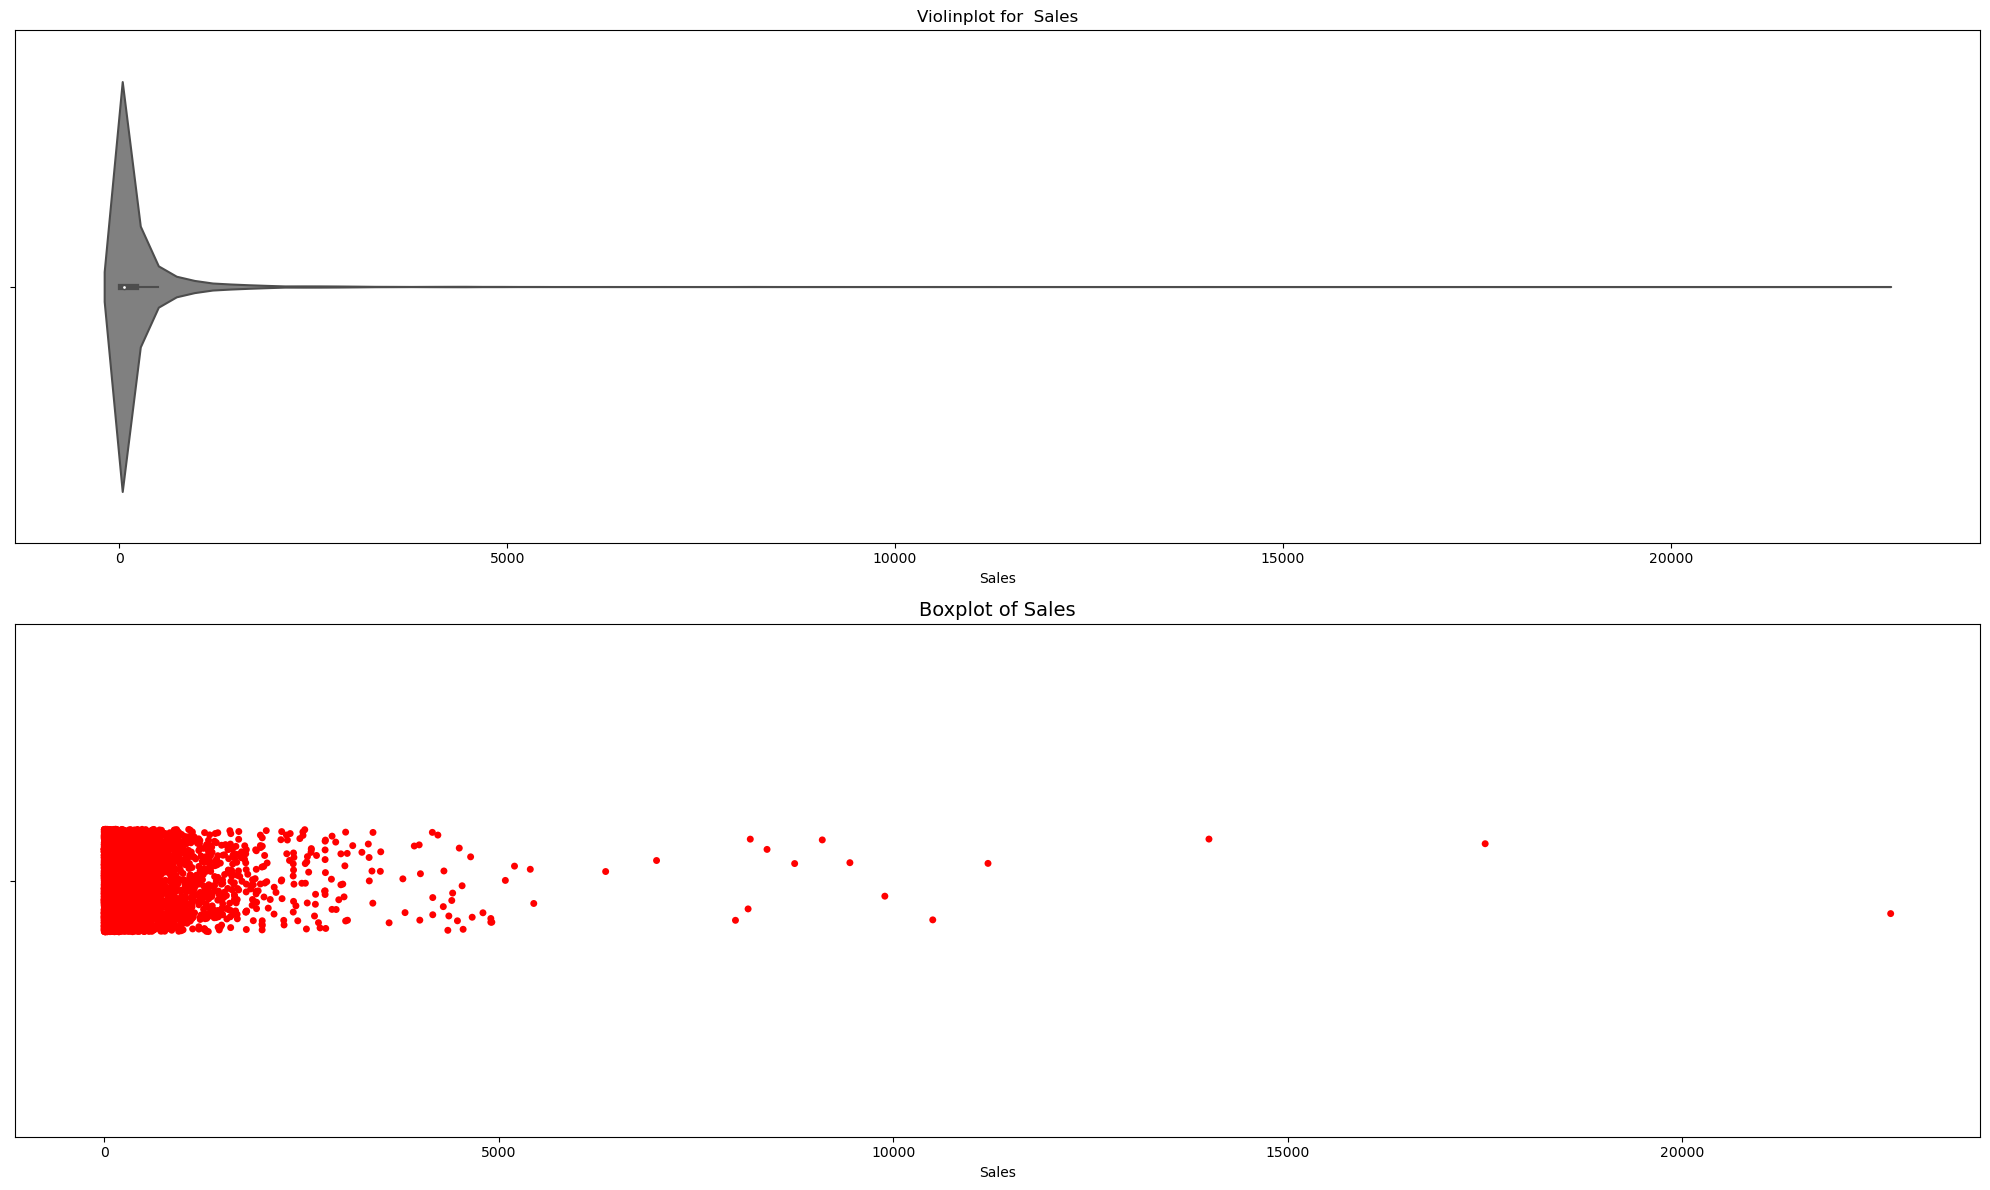

In [7]:
univariate_quant('Sales')

<AxesSubplot:ylabel='Frequency'>

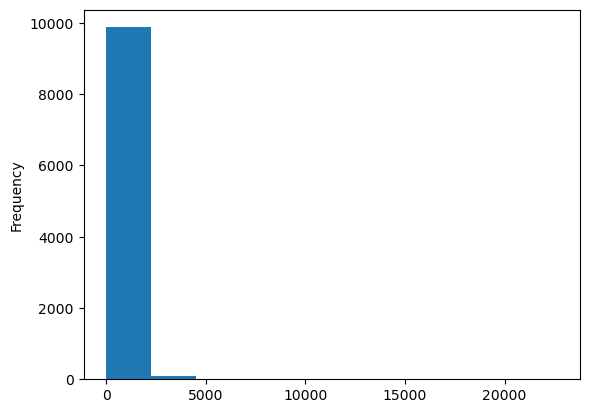

In [34]:
store_data.Sales.plot(kind = 'hist')

#### Quantity
Univariate Analysis of Quantity will help us understand that what was the Quantity of the products.

It tells us that the quantity are mostly confined between 2 to 4.

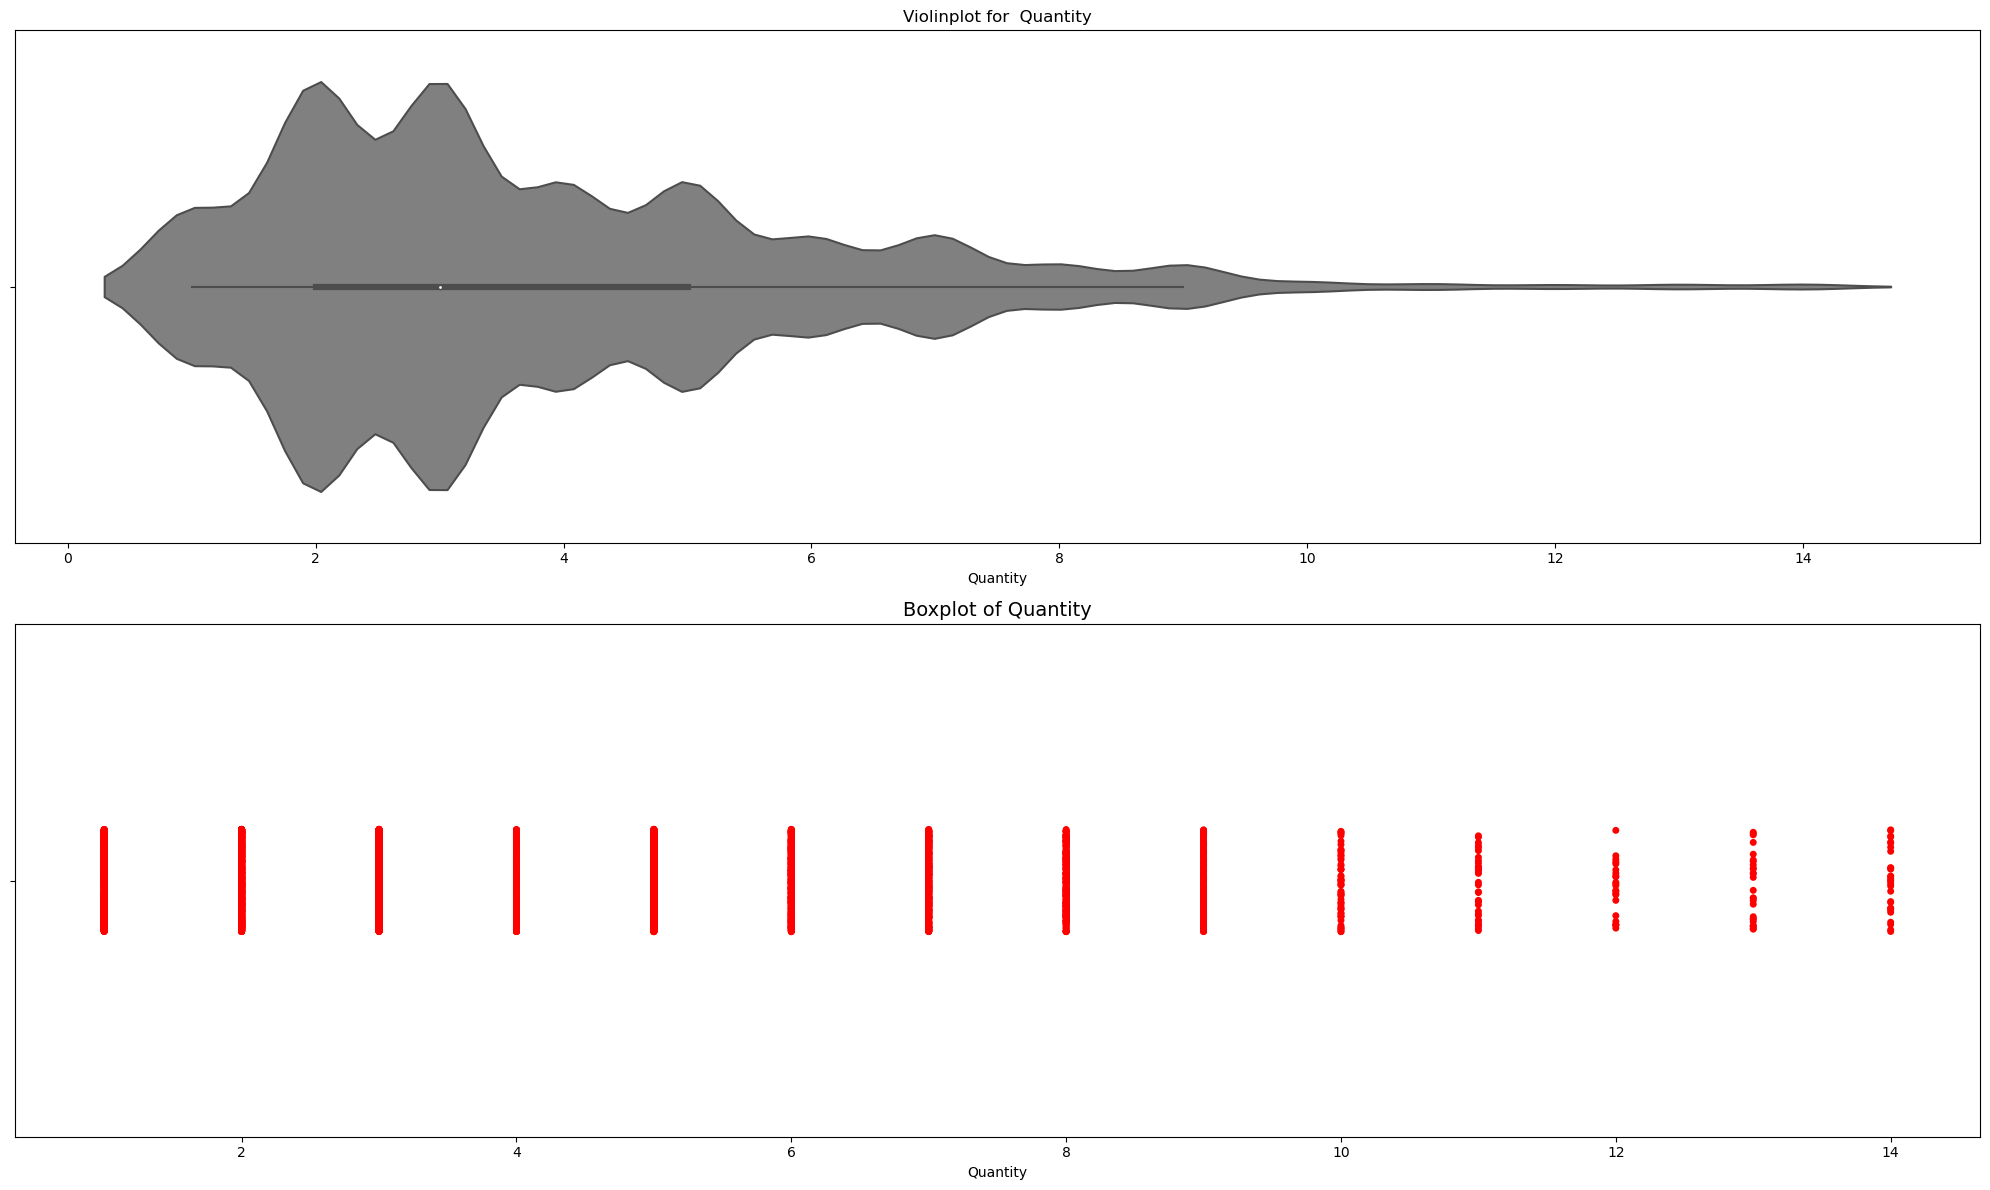

In [8]:
univariate_quant('Quantity')

<AxesSubplot:ylabel='Frequency'>

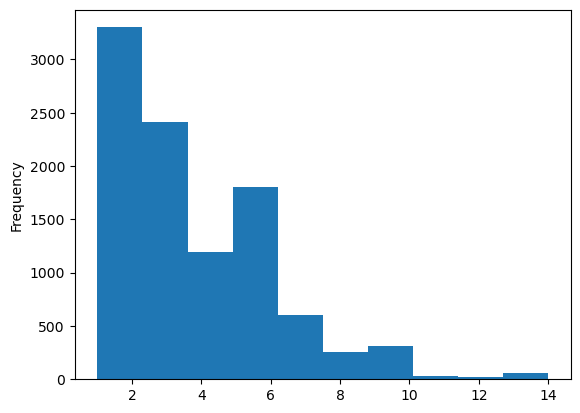

In [37]:
store_data.Quantity.plot(kind = 'hist')

#### Discount
Univariate Analysis of Discount will help us understand that what is the discounts on the products.

This plot tells us that mostly it is confined to two points;

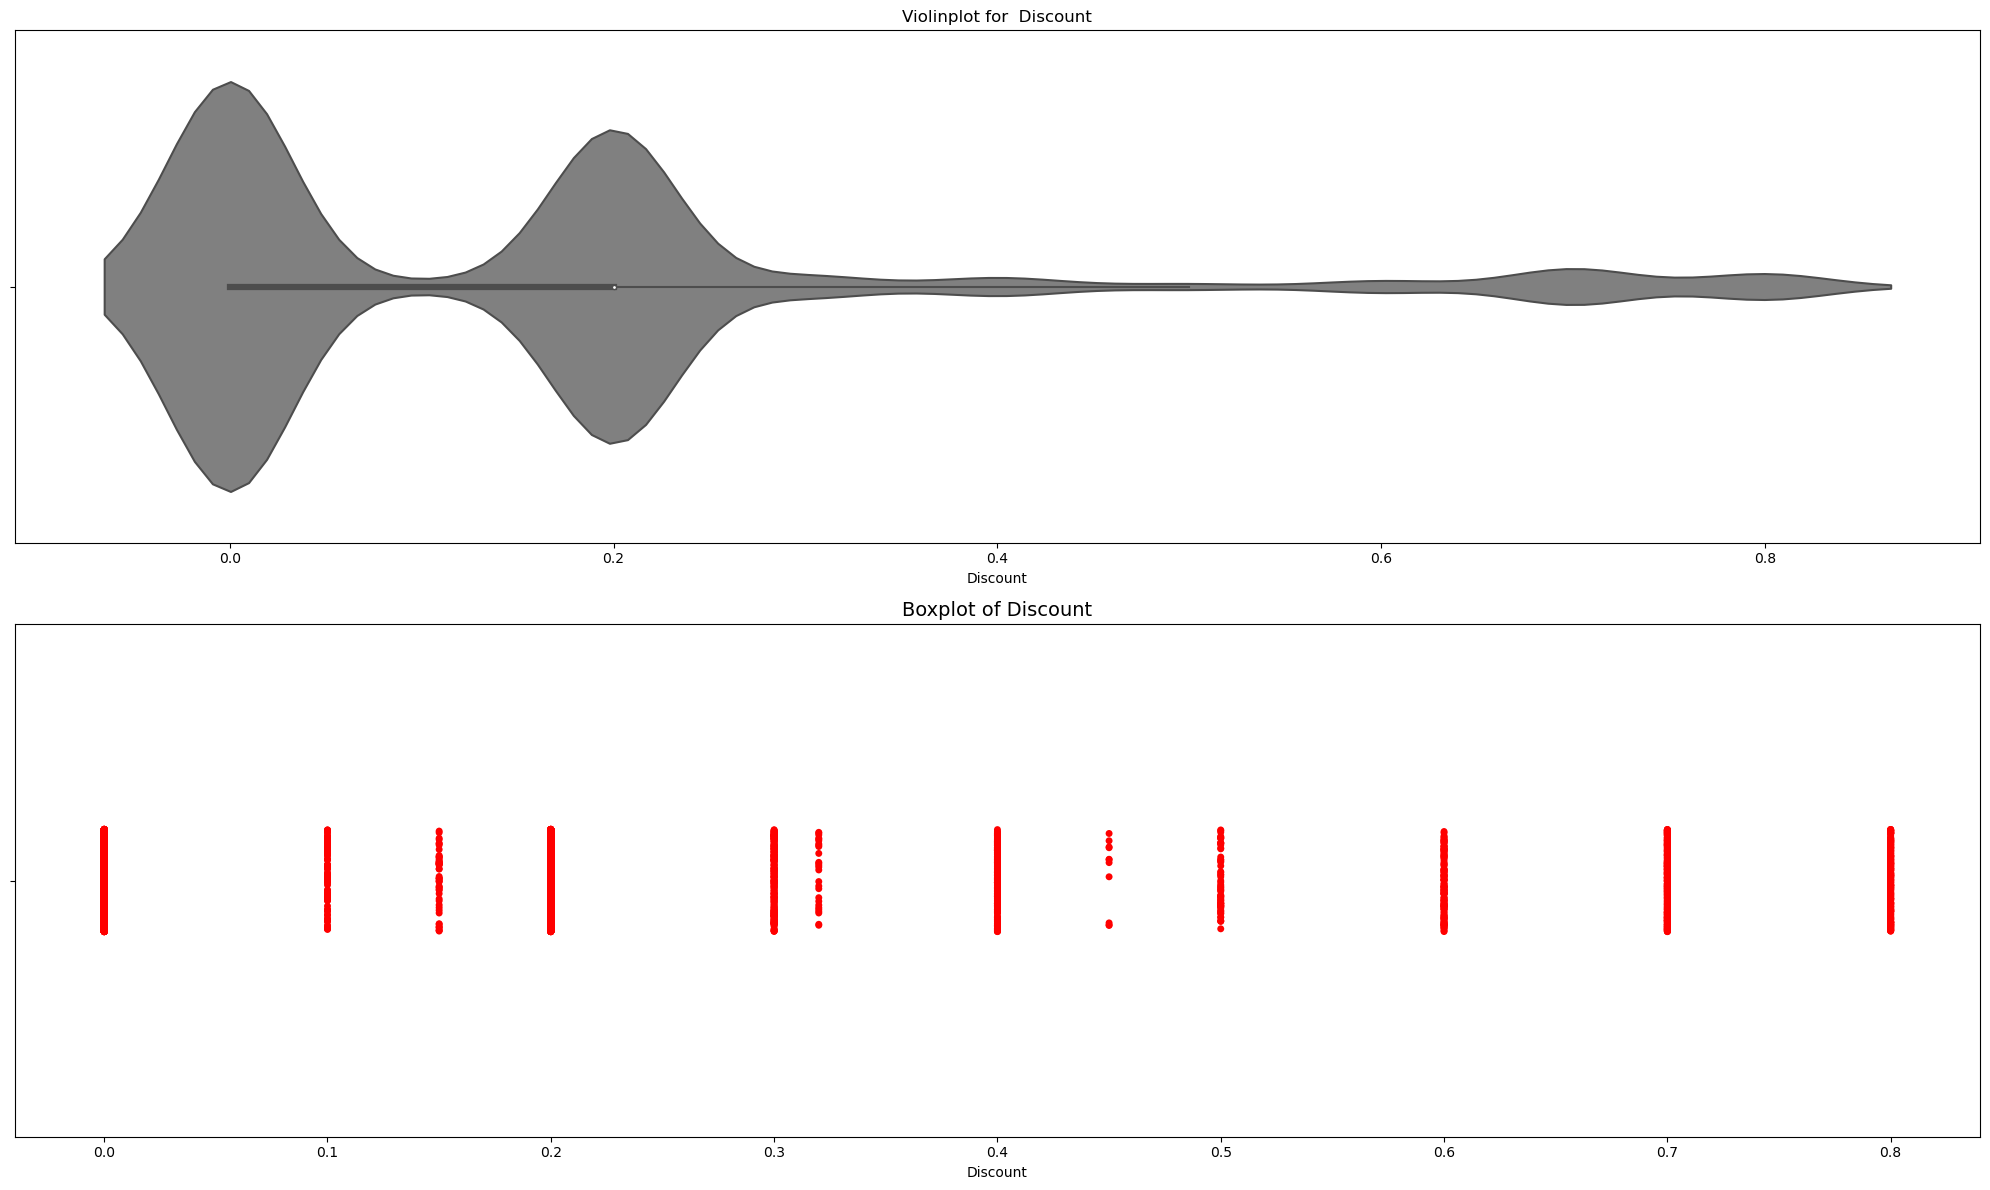

In [9]:
univariate_quant('Discount')

<AxesSubplot:ylabel='Frequency'>

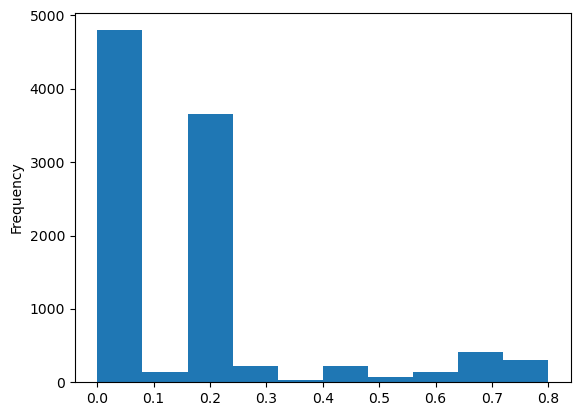

In [40]:
store_data.Discount.plot(kind = 'hist')

#### Profit
Univariate Analysis of Profit will help us understand that what profit have they gained on the products.

This plot tells us that mostly no profit can be seen.

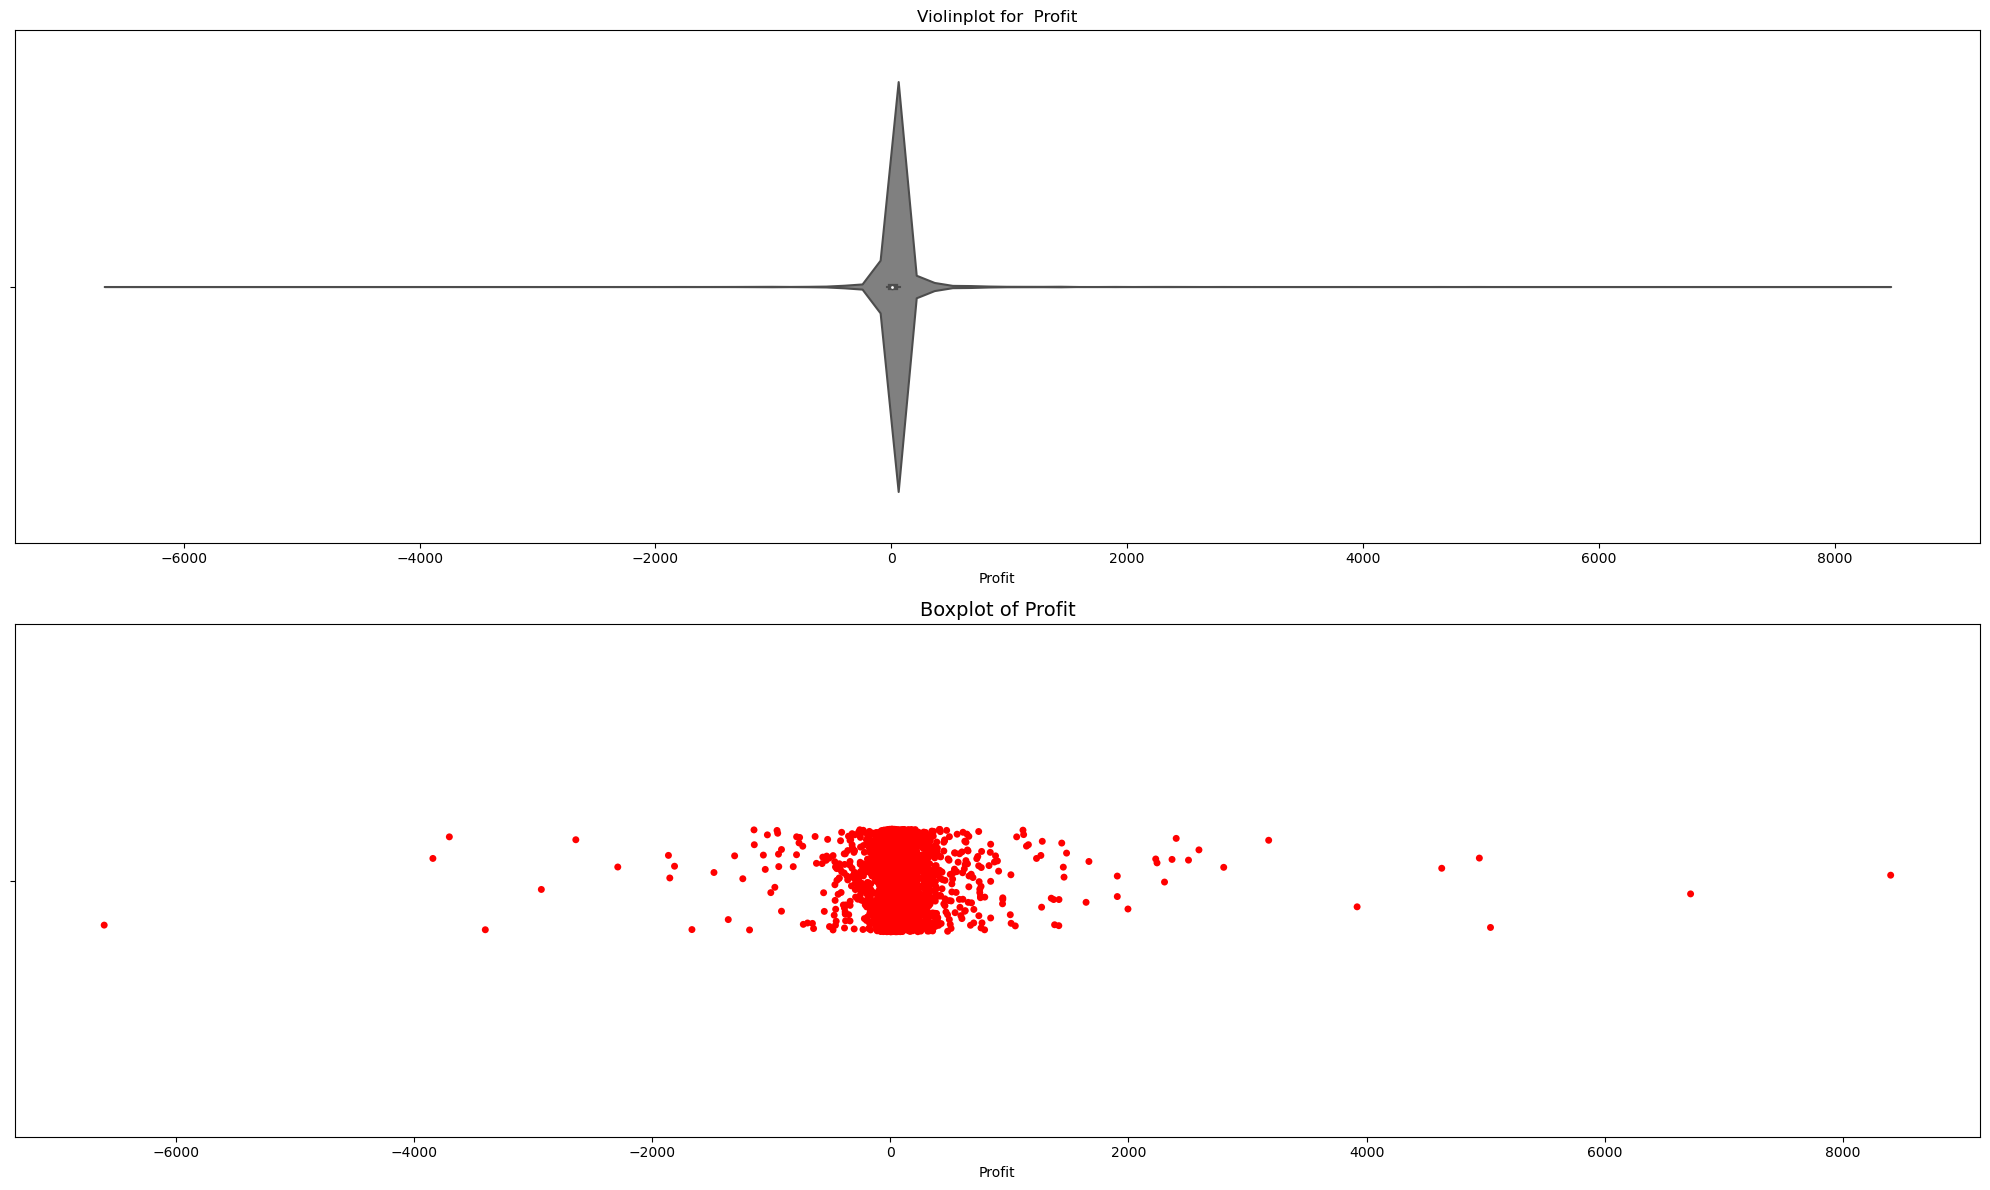

In [10]:
univariate_quant('Profit')

<AxesSubplot:ylabel='Frequency'>

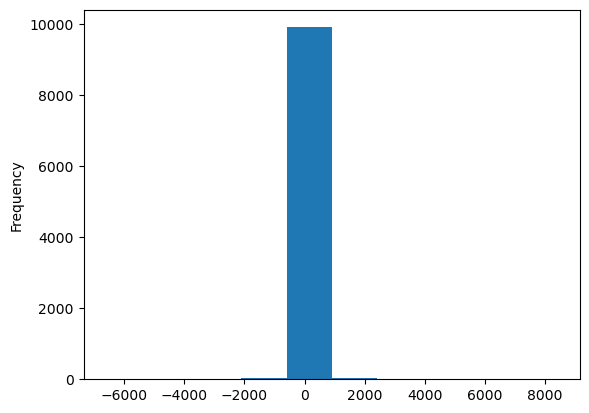

In [42]:
store_data.Profit.plot(kind = 'hist')

## Univariate Analysis (Categorical)

The categorical univariate charts are quite differnet from that of qualitative ones.

While as quantitative analysis is more numerical and statistical in nature, qualitative univariate analysis is more frequency based.

In [47]:
store_data.select_dtypes('object').head(3)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels


#### Segments

Insights -

Across all the segments it is the consumer which are highest in quantity.

In [48]:
store_data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

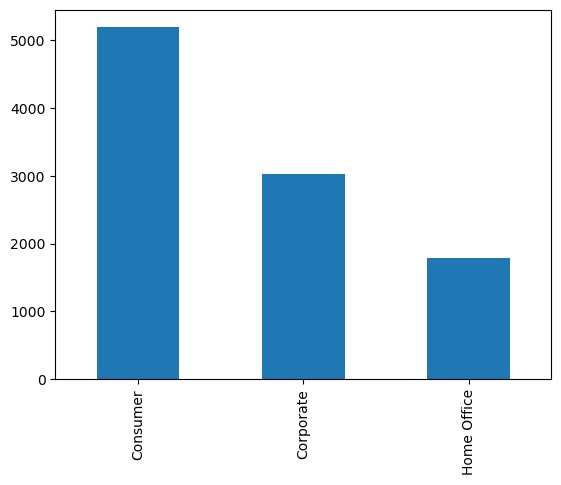

In [50]:
store_data.Segment.value_counts().plot(kind = 'bar')
plt.show()

#### State

Insights;

.Most Superstores are there in California which is 2001.

.Least Superstores are there in Wyoming which is 1.

In [11]:
store_data.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<AxesSubplot:>

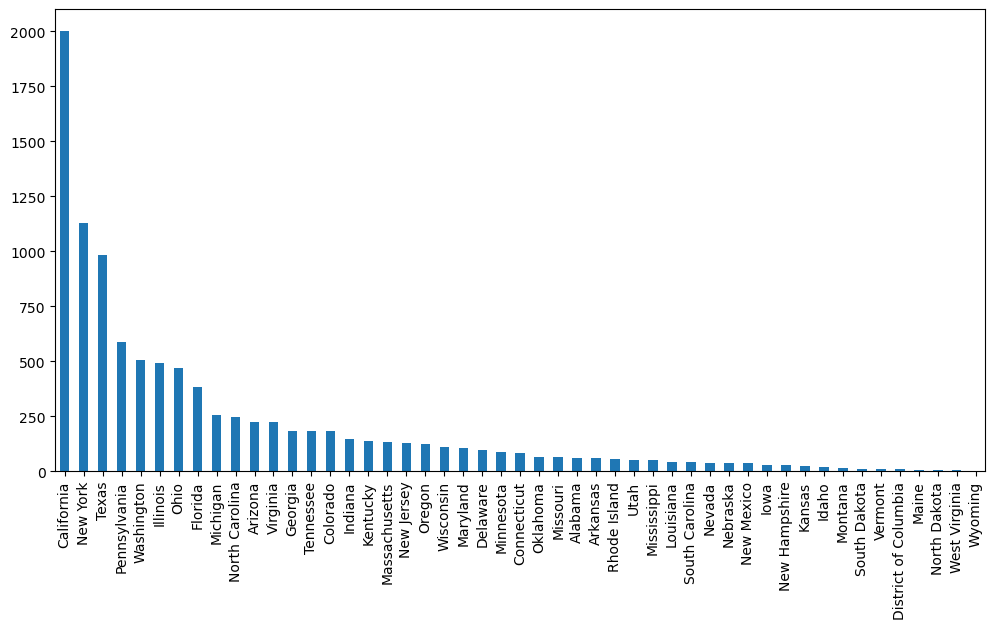

In [61]:
store_data.State.value_counts().plot(kind = 'bar', figsize = (12,6))

#### Region

Insights;

-Most Superstores are ther in West region.

-Least Superstores are there in South region.

In [59]:
store_data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<AxesSubplot:>

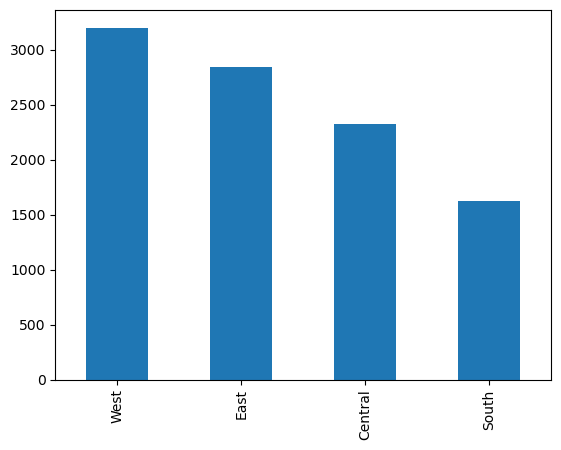

In [62]:
store_data.Region.value_counts().plot(kind = 'bar')

#### Category

Insights:

Office supplies is the highest selling category we have.

In [70]:
store_data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:>

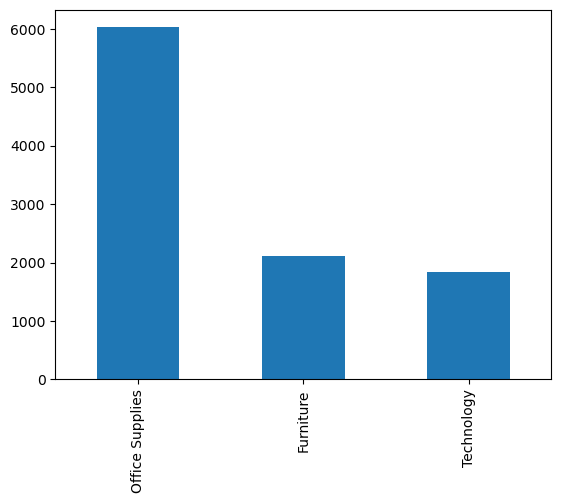

In [64]:
store_data.Category.value_counts().plot(kind = 'bar')

#### In Sub-Category,
Binders have been sold the most (1523), followed by paper (1370), and Furnishings (957); whereas the least sold sub-Category are Copiers (68), Machines (115), and Supplies (190).

In [73]:
store_data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:>

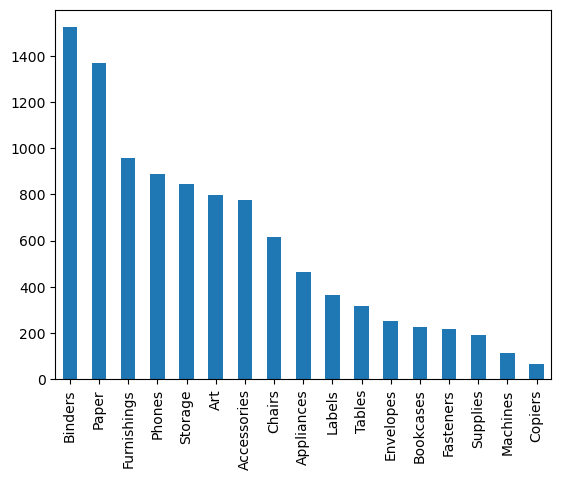

In [74]:
store_data['Sub-Category'].value_counts().plot(kind = 'bar')

In [76]:
store_data.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


#### nunique() method

It is used to return the number of unique values for each column.

In [77]:
store_data.groupby('Segment').nunique()

,Ship Mode,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,
Consumer,4,1,422,47,512,4,3,17,3645,14,12,4273
Corporate,4,1,340,45,414,4,3,17,2393,14,12,2644
Home Office,4,1,264,48,332,4,3,17,1525,14,12,1610


In [81]:
store_data.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [93]:
store_data.describe(percentiles = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]).T

,count,mean,std,min,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,100%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,10009.00000,10024.00000,19140.00000,30605.0000,43229.0000,56430.5000,75217.0000,83211.000,90049.0000,94122.00000,98006.000000,98115.000000,99301.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,4.98000,7.89720,13.77600,21.4544,34.2480,54.4900,89.8096,158.376,281.3720,572.70600,956.984245,2481.694600,22638.480,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,1.00000,2.00000,2.00000,2.0000,3.0000,3.0000,4.0000,5.000,5.0000,7.00000,8.000000,11.000000,14.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.00000,0.00000,0.0000,0.0000,0.2000,0.2000,0.200,0.2000,0.40000,0.700000,0.800000,0.800,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,-53.03092,-15.47346,0.40032,2.9568,5.4432,8.6665,13.4913,22.200,41.0388,89.28162,168.470400,580.657882,8399.976,8399.976


Outlier Treatment
- Just consider the top 5% and bottom 5% of the data as outliers.
p1p99
p5p95
p10p90

#### df.clip() or Series.clip()

df.clip() or df.Series() are used to clip outliers from the given data, so that later on a model can be made and it can be judged without any outliers.

In [99]:
lower_cutoff = store_data.Profit.quantile(0.15)

In [100]:
upper_cutoff = store_data.Profit.quantile(0.85)

In [101]:
store_data['Profit'] = store_data.Profit.clip(lower_cutoff, upper_cutoff)

In [103]:
store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.00000,23223.00000,56430.5000,90008.000,99301.00000
Sales,9994.0,229.858001,623.245101,0.44400,17.28000,54.4900,209.940,22638.48000
Quantity,9994.0,3.789574,2.225110,1.00000,2.00000,3.0000,5.000,14.00000
Discount,9994.0,0.156203,0.206452,0.00000,0.00000,0.2000,0.200,0.80000
Profit,9994.0,17.473235,21.712318,-4.77936,1.72875,8.6665,29.364,58.17903


In [104]:
def outlier_treatment(x):
    lower = x.quantile(0.15)
    upper = x.quantile(0.85)
    
    return x.clip(lower, upper)

In [107]:
store_data['Sales'] = outlier_treatment(store_data.Sales)

In [108]:
store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.00000,23223.00000,56430.5000,90008.000,99301.000000
Sales,9994.0,126.201643,138.698340,10.77600,17.28000,54.4900,209.940,388.430685
Quantity,9994.0,3.789574,2.225110,1.00000,2.00000,3.0000,5.000,14.000000
Discount,9994.0,0.156203,0.206452,0.00000,0.00000,0.2000,0.200,0.800000
Profit,9994.0,17.473235,21.712318,-4.77936,1.72875,8.6665,29.364,58.179030


In [109]:
store_data_continuous = store_data.select_dtypes('number')

In [111]:
store_data_continuous.head(2)

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.960000,2,0.0,41.91360
1,42420,388.430685,3,0.0,58.17903


In [110]:
store_data_categorical = store_data.select_dtypes('object')

In [112]:
store_data_categorical.head(2)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs


In [113]:
def univariate_continuous(x):
    
    print('Analysis for', x.name)
    x.hist()
    plt.ylabel('Frequency')
    plt.xlabel(x.name)
    plt.show()

Analysis for Postal Code


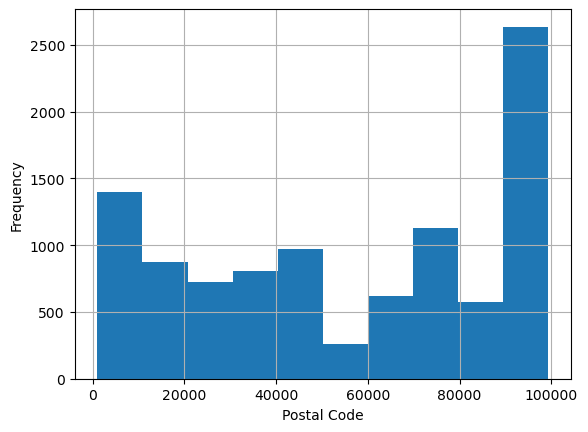

Analysis for Sales


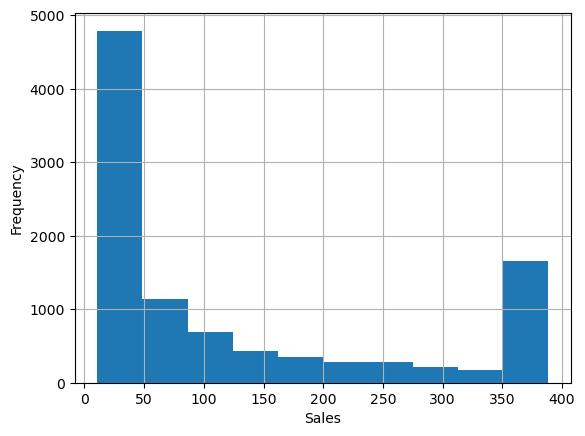

Analysis for Quantity


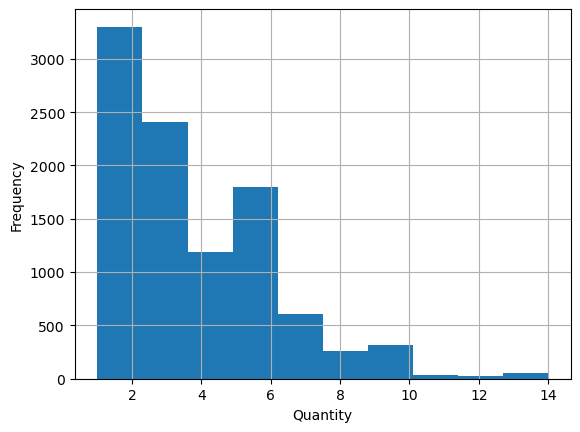

Analysis for Discount


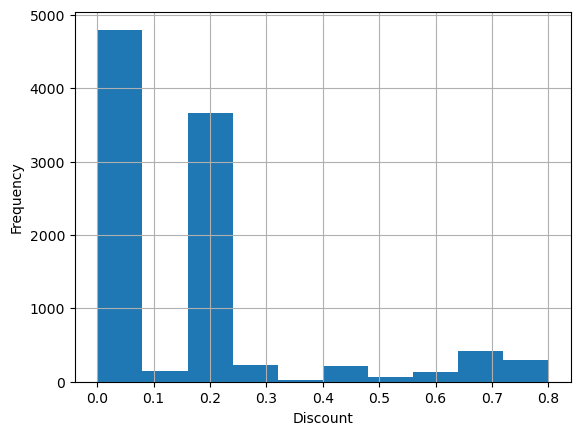

Analysis for Profit


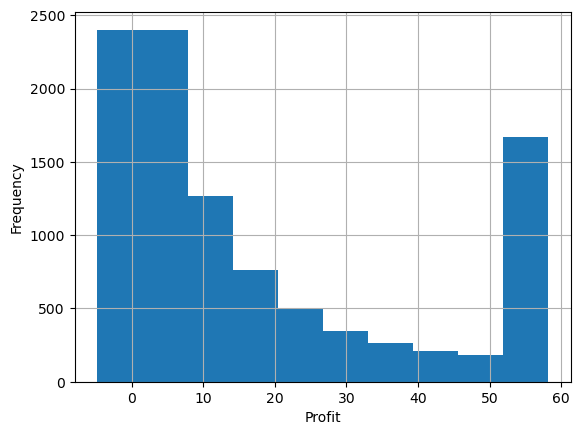

Postal Code    None
Sales          None
Quantity       None
Discount       None
Profit         None
dtype: object

In [114]:
store_data_continuous.apply(univariate_continuous)

## Bivariate Analysis

continuous vs continuous

In [115]:
store_data_continuous.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.007294,0.012761,0.058443,-0.032920
Sales,-0.007294,1.000000,0.257799,-0.064607,0.597709
Quantity,0.012761,0.257799,1.000000,0.008623,0.254444
Discount,0.058443,-0.064607,0.008623,1.000000,-0.423299
Profit,-0.032920,0.597709,0.254444,-0.423299,1.000000


-- Sales and Profit have a good linear relationship. ( If anything has a linear relation of more than 0.5 it can be considered as a good relationship, which in this case is true only between two Sales and Profit.)

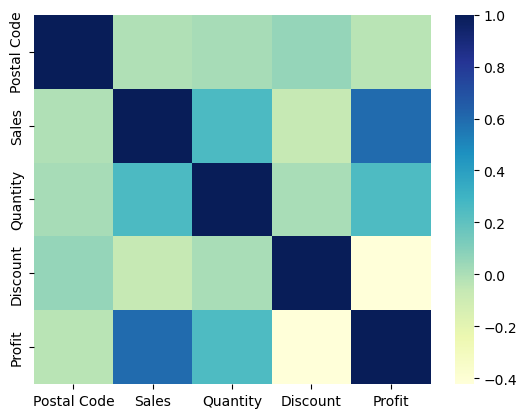

In [139]:
heatmap_store_data=store_data_continuous.corr()
_=sns.heatmap(heatmap_store_data, cmap='YlGnBu')